In [327]:
import os
import nltk
#nltk.download('wordnet')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt

### Part 1: Set-up ###


#### 1. To begin, you will first work through processing the data. Start by loading in the training data and test data. Keep each in their own dataframe/list (i.e. a dataframe/list for all training observation text and a separate one for all test observations). How many training and test observations do you have? ####

In [5]:
pwd

'C:\\Users\\iGuest\\Documents\\IMT 575\\PS3'

In [104]:
df = pd.DataFrame(columns=['documents'])

In [105]:
path = os.getcwd()+'\\train'

filelist = []
df_train = df
files = os.listdir(path)
for file in files:
    if file.endswith(".txt"):
        filelist.append(file.split('_')[0].lower())
        df_train = df_train.append(pd.read_csv('train/'+file, sep='/n', header=None, names=['documents']))

C:\Users\iGuest\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [106]:
df_train.head()

,documents
0,Joe Biden: I refuse to postpone any longer tak...
0,Joe Biden: Because it got done before. Iâ€™m t...
0,"Joe Biden: No, what I said was, the questionâ€..."
0,"Joe Biden: What Latinos should look at is, com..."
0,Joe Biden: What I would do as president is sev...


In [107]:
df_train.shape

(528, 1)

#### The training data has 528 observations. ####

In [724]:
path = os.getcwd()+'\\test'

test_file_list = []
df_test = df
for file in os.listdir(path):
    if file.endswith(".txt"):
        test_file_list.append(file)
        df_test = df_test.append(pd.read_csv('test/'+file, sep='/n', header=None, names=['documents']))

C:\Users\iGuest\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [11]:
df_test.head()

,documents
0,"You know, I served under General Dunford, way ..."
0,"You know, when President Kennedy announced the..."
0,This is a problem which continues to get worse...
0,"Well, first of all, I have no criticism of tha..."
0,Iâ€™m running for president because our countr...


In [12]:
df_test.shape

(111, 1)

#### The test data has 111 observations ####

#### 2. Create a vector of training labels. These labels can be found in one of two ways: in the file name of each training data observation and at the beginning of the text for each training file. The test data will not have the labels at the beginning of the text so remove these labels from your training observations. Are there any instances where the name of the file does not align with the name at the start of the text? If so, how many such observations are there? Exclude these from your training data. What does the distribution of labels look like? Comment on what you see. ####

In [108]:
trainlabels = df_train.documents.apply(lambda x: x.split(': ')[0].lower())
trainlabelslist = trainlabels.tolist()

df_train = df_train.documents.apply(lambda x: x.split(': ')[1])

trainlabels[:5]

0    joe biden
0    joe biden
0    joe biden
0    joe biden
0    joe biden
Name: documents, dtype: object

In [109]:
counts=0
for i in range(len(filelist)):
    if filelist[i] not in trainlabelslist[i]:
        counts+=1
print(counts)

0


#### Thus, there are no instances where the name of the file does not align with the name at the start of the text.

#### Regarding the distribution of these labels, the following graph can give a better idea.

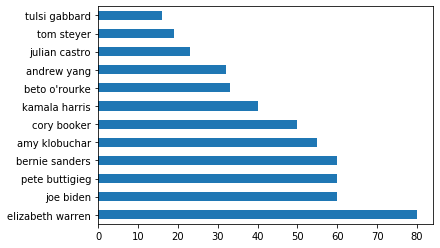

In [110]:
ax = trainlabels.apply(lambda x: x.split(': ')[0].lower()).value_counts().plot.barh()

Thus, we see that our data has class imbalance. Since we are going to perform a classification task, it is important to address this imbalance.

In [805]:
df = pd.Series()
new_label_list = []

for c in classes:
    df_temp = df_train.iloc[[i for i, e in enumerate(trainlabels) if e == c]]
    df = pd.concat([df, df_temp.sample(80, replace=True)], axis=0)
    new_label_list.append([c]*80)

new_label_list = [item for sublist in new_label_list for item in sublist]
    
print(df.shape)
print(df.head)
print(len(new_label_list))

(960,)
<bound method NDFrame.head of 0    unlike trump tweet three morning work internat...
0    must must get recognize country move oligarchi...
0    think get think mean president obama say nobod...
0    trump pathological liar tell truth afghanistan...
0    second maybe make money healthcare job run non...
0    talk others talk deductibles co jake tapper qu...
0    let blunt tell hear much congress media go wit...
0    trump pathological liar tell truth afghanistan...
0    right tear system american people want america...
0    well respond say supportive jim clyburn legisl...
0    people think take insurance industry take phar...
0    talk rig economy grotesque level income wealth...
0    alright american people want tax break billion...
0    amy mention women feel strongly well let tell ...
0    let blunt tell hear much congress media go wit...
0    david let answer let comment something vice pr...
0    well let say one big differences vice presiden...
0    think end day appreciat

In [806]:
df_train = df
trainlabels = new_label_list

 #### 3. Convert the training data to lower case. Remove punctuation from the training data. Also remove stop words from the training data using the NLTK package's English stop word list. In addition to NLTK's stopwords, are there words specific to this dataset that may be worthwhile to treat as stop words? What are these words and why would you exclude them? Remove these additional stop words from the training data as well (note: you can also remove this secondary set of stop words after tokenizing. However, keep in mind that this may cause feature alignment issues with your test dataset when you tokenize it.) ####

In [807]:
#Converting all words to lowercase
df_train = df_train.apply(lambda x: " ".join(x.lower() for x in x.split())) 

#Removes Punctuation from all sentences
df_train = df_train.str.replace('[^a-zA-Z_\s]+\w*','')

# Remove stop words
stop = stopwords.words('english')
df_train =  df_train.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [808]:
for i in range(3):
    print(df_train.iloc[i])
    print(" ")

unlike trump tweet three morning work international community necessary negotiate taliban course end day rethink entire war terror cause much pain lose many live men women arm force people region well
 
must must get recognize country move oligarchic form society handful billionaires control economic political life country president prepare take yes raise minimum wage live wage yes finally make sure every american healthcare human right privilege yes address catastrophic crisis climate change transform energy system away fossil fuel
 
think get think mean president obama say nobody gonna tell magical solution crisis come one rural state america vote record nra president suspect f record believe get gut finally take nra ask record back come state gun control call ban sale distribution assault weapons lose election everything take nra expand create universal background check away straw man provision away gun show loophole away loopholes exist gun manufacturers sell large amount weapons c

In the above code, in addition to converting words to lowercase, removing punctuations and removing stop words, I noticed that there were a few letters that were beyond the scope of the English language. In my analysis, I considered them as stop words as well. Thus, I removed those words.

#### 4. Stem/lemmatize your training data using a stemmer/lemmatizer of your choosing. Show a before and after using a few observations and comment on what you see. ####

In [809]:
lemmatizer = WordNetLemmatizer()

#Lemmatizes all the words
df_train = df_train.apply(lambda x: " ".join(lemmatizer.lemmatize(x, wordnet.VERB) for x in x.split()))

In [810]:
for i in range(3):
    print(df_train.iloc[i])
    print(" ")

unlike trump tweet three morning work international community necessary negotiate taliban course end day rethink entire war terror cause much pain lose many live men women arm force people region well
 
must must get recognize country move oligarchic form society handful billionaires control economic political life country president prepare take yes raise minimum wage live wage yes finally make sure every american healthcare human right privilege yes address catastrophic crisis climate change transform energy system away fossil fuel
 
think get think mean president obama say nobody gonna tell magical solution crisis come one rural state america vote record nra president suspect f record believe get gut finally take nra ask record back come state gun control call ban sale distribution assault weapons lose election everything take nra expand create universal background check away straw man provision away gun show loophole away loopholes exist gun manufacturers sell large amount weapons c

### Observations ###

#### NOTE:  In my case, I am lematizing the words to their verb form. ####

As we see in the first record, the words 'taking' and 'moving' get converted to 'take' and 'move' respectively.

In the second record, the words 'marching' and 'supporting' get converted to 'march' and 'support' respectively.

Similar to these, all similar words in the remaining records have been comverted to their base forms as well.

#### 5. Tokenize your training data using unigrams (hint: see sklearn's CountVectorizer). If you set upper and lower limits on word frequency, what are they? How many unique tokens are in your vocabulary? ####

In [811]:
#Convert to vectorized form to transform to BOW
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(df_train.values)
X_train_counts = vectorizer.transform(df_train.values)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train.values)

#Obtaining feature names
words = vectorizer.get_feature_names()

#Converting to dataframe with columns as words
vector_train = pd.DataFrame(X_train_counts.toarray(), columns=words)

In [812]:
#Unique tokens in the vocabulary

len(words)

3379

I have not set any upper and lower limits on the word frequency.

My vocabulary has 3379 unique tokens.

#### 6. Process the test data in a manner identical to the training data. Note that you will need to have the same dimensions for your training and test data. One way in which this can be done is using sklearn's CountVectorizer is to fit on the training data and transform the test data. Show that the number of features for your training and test data are identical. ####

In [813]:
df_test.head()

0    know serve general dunford way general dunford...
0    know president kennedy announce moonshot use p...
0    problem continue get worse say state emergency...
0    well first criticism look get guy white house ...
0    run president country run time even bigger eme...
Name: documents, dtype: object

In [815]:
#Converting all words to lowercase
df_test = df_test.apply(lambda x: " ".join(x.lower() for x in x.split())) 

#Removes Punctuation from all sentences
df_test = df_test.str.replace('[^a-zA-Z_\s]+\w*','')

# Remove stop words
stop = stopwords.words('english')
df_test =  df_test.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

lemmatizer = WordNetLemmatizer()

#Lemmatizes all the words
df_test = df_test.apply(lambda x: " ".join(lemmatizer.lemmatize(x, wordnet.VERB) for x in x.split()))

df_test.head()

0    know serve general dunford way general dunford...
0    know president kennedy announce moonshot use p...
0    problem continue get worse say state emergency...
0    well first criticism look get guy white house ...
0    run president country run time even bigger eme...
Name: documents, dtype: object

In [816]:
X_test_counts = vectorizer.transform(df_test.values)

X_test_tfidf = tfidf_vectorizer.fit_transform(df_test.values)

#Converting to dataframe with columns as words
vector_test = pd.DataFrame(X_test_counts.toarray(), columns=words)

print("Number of features for train data:",len(vector_train.columns))
print("Number of features for test data:",len(vector_test.columns))

Number of features for train data: 3379
Number of features for test data: 3379


Thus, the number of features for both your data are equal.

## Part 2: Supervised Learning ##


#### 7. The primary objective of this problem set is to build classifiers to predict who said what. Having the right features are essential for this (and any) prediction task. In addition to the features you were tasked with generating in Part 1, design/build additional features of your choosing. Please note that this process can be iterative in a cycle of designing/adding features and evaluating model performance - this is completely reasonable and you can come back to this question after completing the remainder of Part 2. Describe the features that you ultimately used in your final models and articulate your reasoning for including the features that you did. Also describe any feature manipulation/scaling you did and your reasoning for doing so. Ensure your test set has identical features as your training set. Some potential ideas for additional features include bi-/trigrams, topic model weights, TF-IDF weights, sentiments, hand-engineered word co-occurrences (not adding any/all of these is completely fine as well). ####

Let us explore the effect of bi-grams. We will first include only bi-grams and then include both uni-grams and bi-grams in our next vector.


PS: I wasn't sure if uni-grams and bi-grams can be combined together. But after some research online, I saw that it can be done. I even found the following paper that explains the effect: https://pdfs.semanticscholar.org/8297/13c1476773796c8c1c577e27f2b9140a9403.pdf


### Considering only bi-grams ###

In [817]:
vectorizer1 = CountVectorizer(binary=True, analyzer='word', ngram_range=(2,2))
vectorizer1.fit(df_train.values)
X_train1_counts = vectorizer1.transform(df_train.values)

tfidf_vectorizer1 = TfidfVectorizer()
X_train1_tfidf = tfidf_vectorizer1.fit_transform(df_train.values)

#Obtaining feature names
words1 = vectorizer1.get_feature_names()

#Converting to dataframe with columns as words
vector_train1 = pd.DataFrame(X_train1_counts.toarray(), columns=words1)

X_test1_counts = vectorizer1.transform(df_test.values)
X_test1_tfidf = tfidf_vectorizer1.transform(df_test.values)

#Converting to dataframe with columns as words
vector_test1 = pd.DataFrame(X_test1_counts.toarray(), columns=words1)

print("Number of features for train data:",len(vector_train1.columns))
print("Number of features for test data:",len(vector_test1.columns))

Number of features for train data: 18034
Number of features for test data: 18034


### Considering uni-grams and bi-grams ###

In [818]:
vectorizer2 = CountVectorizer(binary=True, analyzer='word', ngram_range=(1,2))
vectorizer2.fit(df_train.values)
X_train2_counts = vectorizer2.transform(df_train.values)

tfidf_vectorizer2 = TfidfVectorizer()
X_train2_tfidf = tfidf_vectorizer2.fit_transform(df_train.values)

#Obtaining feature names
words2 = vectorizer2.get_feature_names()

#Converting to dataframe with columns as words
vector_train2 = pd.DataFrame(X_train2_counts.toarray(), columns=words2)

X_test2_counts = vectorizer2.transform(df_test.values)
X_test2_tfidf = tfidf_vectorizer2.transform(df_test.values)

#Converting to dataframe with columns as words
vector_test2 = pd.DataFrame(X_test2_counts.toarray(), columns=words2)

print("Number of features for train data:",len(vector_train2.columns))
print("Number of features for test data:",len(vector_test2.columns))

Number of features for train data: 21413
Number of features for test data: 21413


#### 8. You will create three different models for this problem set: a regularized logistic regression model, a tree-based model (your choice of any tree-based model), and any other model of your choice (regardless of whether it was discussed in class or not). You do not need to implement anything from scratch and can use out-of-the-box models/pipelines. To start, build a regularized logistic regression model. What was your regularization coefficient and how well does this model perform? Are there any classes where it performs particularly well? Are there any classes where it performs particularly poorly? Use graphs/tables where appropriate and contextualize results. ####

In [819]:
from time import time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

In [820]:
def Split(df, labels):
    traindata, testdata, trainlabel, testlabel = train_test_split(df, labels, test_size=0.2, random_state=0, stratify=trainlabels)
    return traindata, testdata, trainlabel, testlabel

A deeper analysis of the labels of the split confirmed to me that the classes are indeed stratified. Next, let us build the regularized Logistic Regression model. Now, like for every other model, we need to find the optimal hyperparameters. For this, we will be using the GridSearchCV method. In this case, we will be optimizing the penalty and the regularization factor 'C'.

In [821]:
def buildLogisticRegression(traindata, testdata, trainlabel, testlabel):
    
    clf = LogisticRegression(multi_class='auto', solver='liblinear', max_iter=5000, dual=False)

    # use a full grid over all parameters
    param_grid = {'C': [10, 1, 0.1, 0.01], 'penalty':['l1', 'l2']}

    start = time()

    # run grid search
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=True)

    start = time()
    grid_search.fit(traindata, trainlabel)

    print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
          % (time() - start, len(grid_search.cv_results_['params'])))

    print(grid_search.best_params_)
    print(" ")

    clf = grid_search.best_estimator_
    clf.fit(traindata, trainlabel)

    print('holdout set accuracy:', clf.score(testdata, testlabel))

    print("Total time taken:",(time() - start))

Logistic Regression on the uni-gram only data.

In [822]:
traindata, testdata, trainlabel, testlabel = Split(X_train_counts, trainlabels)
print("Shape of the training data is:",traindata.shape)
print("Shape of the holdout set is:",testdata.shape)

Shape of the training data is: (768, 3379)
Shape of the holdout set is: (192, 3379)


In [823]:
buildLogisticRegression(traindata, testdata, trainlabel, testlabel)

C:\Users\iGuest\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV took 53.23 seconds for 8 candidate parameter settings.
{'C': 10, 'penalty': 'l2'}
 
holdout set accuracy: 0.8958333333333334
Total time taken: 53.33158802986145


Logistic Regression on the bi-gram only data.

In [824]:
traindata, testdata, trainlabel, testlabel = Split(X_train1_counts, trainlabels)
print("Shape of the training data is:",traindata.shape)
print("Shape of the holdout set is:",testdata.shape)

Shape of the training data is: (768, 18034)
Shape of the holdout set is: (192, 18034)


In [825]:
buildLogisticRegression(traindata, testdata, trainlabel, testlabel)

C:\Users\iGuest\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV took 167.14 seconds for 8 candidate parameter settings.
{'C': 1, 'penalty': 'l2'}
 
holdout set accuracy: 0.875
Total time taken: 167.28493690490723


Logistic Regression on the uni-gram plus bi-gram data.

In [826]:
traindata, testdata, trainlabel, testlabel = Split(X_train2_counts, trainlabels)
print("Shape of the training data is:",traindata.shape)
print("Shape of the holdout set is:",testdata.shape)

Shape of the training data is: (768, 21413)
Shape of the holdout set is: (192, 21413)


In [827]:
buildLogisticRegression(traindata, testdata, trainlabel, testlabel)

GridSearchCV took 9.09 seconds for 8 candidate parameter settings.
{'C': 0.1, 'penalty': 'l2'}
 
holdout set accuracy: 0.9010416666666666
Total time taken: 9.286568641662598


Logistic Regression on the TF-IDF vectorized data.

In [828]:
traindata, testdata, trainlabel, testlabel = Split(X_train_tfidf, trainlabels)
print("Shape of the training data is:",traindata.shape)
print("Shape of the holdout set is:",testdata.shape)

buildLogisticRegression(traindata, testdata, trainlabel, testlabel)

Shape of the training data is: (768, 3379)
Shape of the holdout set is: (192, 3379)
GridSearchCV took 1.79 seconds for 8 candidate parameter settings.
{'C': 10, 'penalty': 'l2'}
 
holdout set accuracy: 0.9322916666666666
Total time taken: 1.8593614101409912


#### Purely on the basis of these accuracy values, I see that we get the best model for our TF-IDF vectorized data. ####

For the sake of uniformity, we have to use this same dataset for all our future model building processes.

In [841]:
#Using the uni- plus bi- gram data
traindata, testdata, trainlabel, testlabel = Split(X_train_tfidf, trainlabels)

#Building our final logistic regression model
clf = LogisticRegression(penalty='l2', multi_class='auto', solver='liblinear', max_iter=5000, dual=False, C=10)
clf.fit(traindata, trainlabel)
print('Holdout set accuracy:', clf.score(testdata, testlabel))
predictions = clf.predict(testdata)

Holdout set accuracy: 0.9322916666666666


In [845]:
print(classification_report(testlabel, predictions))

print(cohen_kappa_score(testlabel, predictions, labels=clf.classes_))

                  precision    recall  f1-score   support

   amy klobuchar       1.00      0.88      0.93        16
     andrew yang       0.94      1.00      0.97        16
  bernie sanders       0.88      0.94      0.91        16
   beto o'rourke       1.00      1.00      1.00        16
     cory booker       1.00      0.88      0.93        16
elizabeth warren       0.88      0.88      0.88        16
       joe biden       0.84      1.00      0.91        16
   julian castro       0.94      1.00      0.97        16
   kamala harris       0.93      0.88      0.90        16
  pete buttigieg       0.80      0.75      0.77        16
      tom steyer       1.00      1.00      1.00        16
   tulsi gabbard       1.00      1.00      1.00        16

        accuracy                           0.93       192
       macro avg       0.93      0.93      0.93       192
    weighted avg       0.93      0.93      0.93       192

0.9261363636363636


In [843]:
def get_class_wise_accuracy(testlabel,predictions):
    df_predictions = pd.DataFrame({'trueval':testlabel, 'pred':predictions})
    classes = set(df_predictions.trueval)
    accuracy_list = []

    for c in classes:
        df_temp = df_predictions[df_predictions['trueval']==c]
        temp = round(((df_temp['pred']==c).sum())/len(df_temp), 3)
        accuracy_list.append(temp)
        print("For the class",c,"the accuracy is:",temp)
    
    fig, ax = plt.subplots()

    ax.barh(list(classes), accuracy_list, align='center')
    ax.set_yticklabels(classes)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_title('Accuracy For Each Label')

    plt.show()

For the class bernie sanders the accuracy is: 0.938
For the class tom steyer the accuracy is: 1.0
For the class beto o'rourke the accuracy is: 1.0
For the class amy klobuchar the accuracy is: 0.875
For the class cory booker the accuracy is: 0.875
For the class julian castro the accuracy is: 1.0
For the class andrew yang the accuracy is: 1.0
For the class tulsi gabbard the accuracy is: 1.0
For the class joe biden the accuracy is: 1.0
For the class elizabeth warren the accuracy is: 0.875
For the class kamala harris the accuracy is: 0.875
For the class pete buttigieg the accuracy is: 0.75


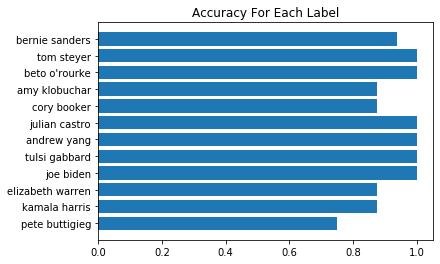

In [844]:
get_class_wise_accuracy(testlabel,predictions)

### Model Performance Analysis ###

The best model for Logistic Regression gives an accuracy of 93.2 percent, which is really impressive. The model takes 1.85 secs to build, which should be one of the factors to be considered in our final model selection.

This model performs really well on all the classes, with atleast 85+ accuracy for each class.

#### 9. Next, build a tree-based model. Which model did you use and why? Are there any classes where it performs particularly well? Are there any classes where it performs particularly poorly? Use graphs/tables where appropriate and contextualize results. ####

In [829]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [852]:
def buildRFmodel(traindata, testdata, trainlabel, testlabel):
    clf2 = RandomForestClassifier(random_state=0)

    # use a full grid over all parameters
    param_grid = {'max_depth': [10,30,50],
                  'min_samples_leaf': [3, 4, 5], 
                  'min_samples_split': [8, 10, 12],
                  'n_estimators':[100,300,500]}

    # run grid search
    grid_search = GridSearchCV(clf2, param_grid=param_grid, cv=5, iid=True)

    start = time()
    grid_search.fit(traindata, trainlabel)

    print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
          % (time() - start, len(grid_search.cv_results_['params'])))

    print(grid_search.best_params_)
    print(grid_search.best_estimator_)

    clf2 = grid_search.best_estimator_
    clf2.fit(traindata, trainlabel)
    
    print(" ")
    print('Holdout data accuracy:', clf2.score(testdata, testlabel))
    predictions = clf2.predict(testdata)
    
    print("Total time taken:",time() - start)
    print(" ")
    
    return predictions

In [831]:
#Using count vectorized uni plus bi gram data

traindata, testdata, trainlabel, testlabel = Split(X_train2_counts, trainlabels)

predictions_counts = buildRFmodel(traindata, testdata, trainlabel, testlabel)

GridSearchCV took 464.74 seconds for 81 candidate parameter settings.
{'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 500}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Holdout data accuracy: 0.9010416666666666
Total time taken: 467.94893074035645


For the class bernie sanders the accuracy is: 0.875
For the class tom steyer the accuracy is: 1.0
For the class beto o'rourke the accuracy is: 1.0
For the class amy klobuchar the accuracy is: 0.625
For the class cory booker the accuracy is: 0.875
For the class julian castro the accuracy is: 0.938
For the class andrew yang the accuracy is: 0.938
For the class tulsi gabbard the accuracy is: 1.0
For the class joe biden the accuracy is: 1.0
For the class elizabeth warren the accuracy is: 0.875
For the class kamala harris the accuracy is: 0.875
For the class pete buttigieg the accuracy is: 0.812


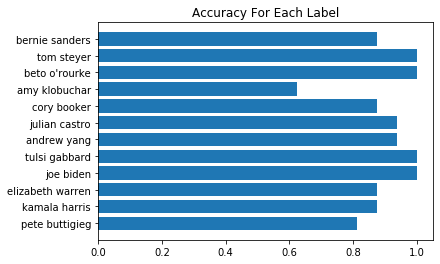

In [833]:
get_class_wise_accuracy(testlabel,predictions_counts)

In [834]:
#Using TF-IDF vectorized uni plus bi gram data

traindata, testdata, trainlabel, testlabel = Split(X_train_tfidf, trainlabels)
predictions_tfidf = buildRFmodel(traindata, testdata, trainlabel, testlabel)

GridSearchCV took 339.51 seconds for 81 candidate parameter settings.
{'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 500}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Holdout data accuracy: 0.8958333333333334
Total time taken: 341.63380908966064


For the class bernie sanders the accuracy is: 0.938
For the class tom steyer the accuracy is: 1.0
For the class beto o'rourke the accuracy is: 1.0
For the class amy klobuchar the accuracy is: 0.5
For the class cory booker the accuracy is: 0.875
For the class julian castro the accuracy is: 1.0
For the class andrew yang the accuracy is: 0.938
For the class tulsi gabbard the accuracy is: 1.0
For the class joe biden the accuracy is: 0.875
For the class elizabeth warren the accuracy is: 0.875
For the class kamala harris the accuracy is: 0.938
For the class pete buttigieg the accuracy is: 0.812


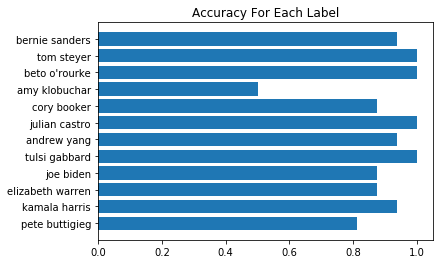

In [835]:
get_class_wise_accuracy(testlabel,predictions_tfidf)

### Model Performance Analysis ###

The best model for RandomForest gives an accuracy of 90, which cannot match the performance of Logistic Regression models we've seen so far.

This model performs really well on almost all the classes, except for the 'amy klobuchar' class, where it only predicts with an accuracy of 60 percent.

#### 10. Next, build any model other than the ones you've already built. Which model did you use and why? Did you tune hyperparameters? If so, which ones and how? Are there any classes where it performs particularly well? Are there any classes where it performs particularly poorly? Use graphs/tables where appropriate and contextualize results. ####

In [836]:
from sklearn.naive_bayes import MultinomialNB

In [851]:
def buildMultinominal(traindata, testdata, trainlabel, testlabel):
    mnb = MultinomialNB()

    param_grid = {'alpha': [0.001,0.01,0.1,1,10], 'fit_prior': [True, False]}

    # run grid search
    # NOTE: GridSearchCV by default considers StratifiedKfold sampling

    grid_search = GridSearchCV(mnb, param_grid=param_grid, cv=5, iid=True)
    grid_search.fit(traindata, trainlabel)

    print("The best estimator is:",grid_search.best_estimator_)
    print("The best parameters are:",grid_search.best_params_)
    
    mnb = grid_search.best_estimator_
    predictions = mnb.fit(traindata.toarray(), trainlabel).predict(testdata.toarray())

    print(" ")
    print("Number of mislabeled points out of a total %d points : %d" % (testdata.shape[0], (testlabel != predictions).sum()))
    print("Accuracy:",metrics.accuracy_score(testlabel, predictions))
    print(" ")
    
    return mnb, predictions

The best estimator is: MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
The best parameters are: {'alpha': 1, 'fit_prior': True}
Number of mislabeled points out of a total 192 points : 12
Accuracy: 0.9375
For the class bernie sanders the accuracy is: 0.938
For the class tom steyer the accuracy is: 1.0
For the class beto o'rourke the accuracy is: 1.0
For the class amy klobuchar the accuracy is: 0.812
For the class cory booker the accuracy is: 0.875
For the class julian castro the accuracy is: 1.0
For the class andrew yang the accuracy is: 1.0
For the class tulsi gabbard the accuracy is: 1.0
For the class joe biden the accuracy is: 1.0
For the class elizabeth warren the accuracy is: 0.875
For the class kamala harris the accuracy is: 0.938
For the class pete buttigieg the accuracy is: 0.812


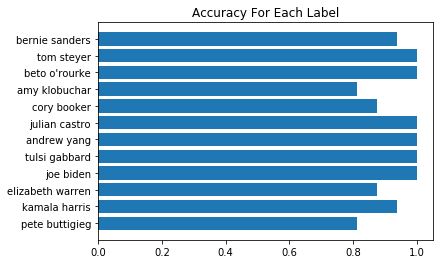

Total time taken: 1.5934059619903564


In [847]:
traindata, testdata, trainlabel, testlabel = Split(X_train2_counts, trainlabels)

start = time()

model, predictions_counts = buildMultinominal(traindata, testdata, trainlabel, testlabel)

get_class_wise_accuracy(testlabel, predictions_counts)

print("Total time taken:", time() - start)

In [848]:
print(classification_report(testlabel, predictions))

print(cohen_kappa_score(testlabel, predictions, labels=clf.classes_))

                  precision    recall  f1-score   support

   amy klobuchar       1.00      0.88      0.93        16
     andrew yang       0.94      1.00      0.97        16
  bernie sanders       0.88      0.94      0.91        16
   beto o'rourke       1.00      1.00      1.00        16
     cory booker       1.00      0.88      0.93        16
elizabeth warren       0.88      0.88      0.88        16
       joe biden       0.84      1.00      0.91        16
   julian castro       0.94      1.00      0.97        16
   kamala harris       0.93      0.88      0.90        16
  pete buttigieg       0.80      0.75      0.77        16
      tom steyer       1.00      1.00      1.00        16
   tulsi gabbard       1.00      1.00      1.00        16

        accuracy                           0.93       192
       macro avg       0.93      0.93      0.93       192
    weighted avg       0.93      0.93      0.93       192

0.9261363636363636


The best estimator is: MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
The best parameters are: {'alpha': 0.1, 'fit_prior': True}
Number of mislabeled points out of a total 192 points : 17
Accuracy: 0.9114583333333334
For the class bernie sanders the accuracy is: 0.938
For the class tom steyer the accuracy is: 1.0
For the class beto o'rourke the accuracy is: 1.0
For the class amy klobuchar the accuracy is: 0.625
For the class cory booker the accuracy is: 0.875
For the class julian castro the accuracy is: 1.0
For the class andrew yang the accuracy is: 0.938
For the class tulsi gabbard the accuracy is: 1.0
For the class joe biden the accuracy is: 1.0
For the class elizabeth warren the accuracy is: 0.875
For the class kamala harris the accuracy is: 0.938
For the class pete buttigieg the accuracy is: 0.75


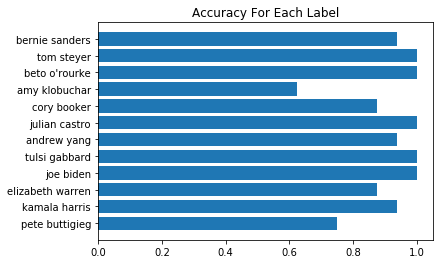

Total time taken: 0.7365767955780029


In [849]:
traindata, testdata, trainlabel, testlabel = Split(X_train_tfidf, trainlabels)

start = time()

model, predictions_tfidf = buildMultinominal(traindata, testdata, trainlabel, testlabel)

get_class_wise_accuracy(testlabel, predictions_tfidf)

print("Total time taken:", time() - start)

In [850]:
print(classification_report(testlabel, predictions))

print(cohen_kappa_score(testlabel, predictions, labels=clf.classes_))

                  precision    recall  f1-score   support

   amy klobuchar       1.00      0.88      0.93        16
     andrew yang       0.94      1.00      0.97        16
  bernie sanders       0.88      0.94      0.91        16
   beto o'rourke       1.00      1.00      1.00        16
     cory booker       1.00      0.88      0.93        16
elizabeth warren       0.88      0.88      0.88        16
       joe biden       0.84      1.00      0.91        16
   julian castro       0.94      1.00      0.97        16
   kamala harris       0.93      0.88      0.90        16
  pete buttigieg       0.80      0.75      0.77        16
      tom steyer       1.00      1.00      1.00        16
   tulsi gabbard       1.00      1.00      1.00        16

        accuracy                           0.93       192
       macro avg       0.93      0.93      0.93       192
    weighted avg       0.93      0.93      0.93       192

0.9261363636363636


### Model Performance Analysis ###

The best model for MultinominalNB gives an accuracy of 93.75, which is the highest of all the models we've seen so far.

This model performs really well on almost all the classes, except for the 'pete buttigieg' class, which still has a decent accuracy of 80 percent.

#### 11. Compare the performance of the three classifiers you built. Which is the strongest? Which is the weakest? Compare their performance across the different classes and use graphs/tables where appropriate. ####

Purely on the basis of accuracy, the best model I get is the MultinomialNB built on the count vectorized data with an accuracy of 93.75%. This model was the strongest one in our list of models.

The weakest model was the RandomForrest model on the count vectorized data with an accuracy of 89.5%.

#### 12. Using any of the three models of your choosing, generate labels for the test set. Use only last names in all caps as outputs. In other words, ensure every label is one of the following (note the lack of apostrophes and punctuation): BIDEN, BOOKER, BUTTIGIEG, CASTRO, GABBARD, HARRIS, KLOBUCHAR, OROURKE, SANDERS, STEYER, WARREN, YANG. Save these labels as you will include them in your submission, as detailed at the end of this document. ####

In [853]:
mnb = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
mnb.fit(X_train2_counts, trainlabels)

print("Shape of the test data:",X_test2_counts.shape)
stage1_predictions = mnb.predict(X_test2_counts)
print("Shape of the predictions:",stage1_predictions.shape)

Shape of the test data: (111, 21413)
Shape of the predictions: (111,)


In [854]:
new_labels = {'amy klobuchar':'KLOBUCHAR',
 'andrew yang':'YANG',
 'bernie sanders':'SANDERS',
 "beto o'rourke":'OROURKE',
 'cory booker':'BOOKER',
 'elizabeth warren':'WARREN',
 'joe biden':'BIDEN',
 'julian castro':'CASTRO',
 'kamala harris':'HARRIS',
 'pete buttigieg':'BUTTIGIEG',
 'tom steyer':'STEYER',
 'tulsi gabbard':'GABBARD'}

stage1_predictions = [new_labels.get(n, n) for n in stage1_predictions]
stage1_predictions[:5]

['WARREN', 'WARREN', 'STEYER', 'HARRIS', 'BUTTIGIEG']

## Part 3: Semi-Supervised Learning ##


#### 13. For this part, we will implement a semi-supervised learning process. As a first step, select which of the classifiers from part 2 you will use. You want a classifier that outputs class probabilities (i.e. predict proba in sklearn). We will be training and re-training this classifier 10 more times so you also want to use a model that does not take long to train. State which model you chose and your thought process for choosing it versus the other models. You may want to copy this model to another variable so you can refer to it in its current form later. ####


I have chosen the Multinominal NB model to use for this process. I will save the mnb model into a new variable called 'new_mnb'. I will run my analysis on this new model.

The thought process behind selecting this model was that even though the logistic model with l2 penalty gave me an accuracy that was close enough, that model took a lot of time to run and also had zero accuracy for some of the classes. The RF model was never in the picture so I did not have to think about that at all.

In [855]:
new_mnb = mnb
new_mnb

predictions = stage1_predictions

#### 14. The process for semi-supervised learning will involve iteratively adding subsets of our test dataset to our training dataset. To start, using the model you selected in QXX, predict label probabilities on the test set. Take the top 10% of test instances which have the highest probability of having the correct labels (i.e. the highest probabilities of belonging to any class). Add your predicted labels to this 10% and then add it to your training data. Retrain your model on this updated training set. How does the performance on the original training dataset compare between this model and the one you trained in Part 2? ####

Before I start using predict_proba, I wanted to check how it works. 

In [856]:
print("The array for the probabilities of the prediction is of the shape:",new_mnb.predict_proba(X_test2_counts).shape)

print("The probabilities for the first row are:")
temp_list = new_mnb.predict_proba(X_test2_counts)[0,:]
print(temp_list)
print(" ")

print("Max probability is at index",list(temp_list).index(max(temp_list)),"which has the label",new_mnb.classes_[list(temp_list).index(max(temp_list))])

print("Which matches to the first prediction:",stage1_predictions[0])

The array for the probabilities of the prediction is of the shape: (111, 12)
The probabilities for the first row are:
[1.70966259e-07 3.02057321e-14 3.78033199e-09 5.50901880e-07
 1.20500066e-08 9.99896766e-01 9.77650440e-06 5.34047949e-26
 8.71551303e-13 9.27134879e-05 8.18882633e-16 6.03379991e-09]
 
Max probability is at index 5 which has the label elizabeth warren
Which matches to the first prediction: WARREN


In [858]:
X_train2_counts_new = X_train2_counts
X_test2_counts_new = X_test2_counts.toarray()
labels = [new_labels.get(n, n) for n in trainlabels]

traindata, testdata, trainlabel, testlabel = Split(X_train2_counts, trainlabels)

traindata = traindata.toarray()
trainlabel = [new_labels.get(n, n) for n in trainlabel]
testlabel = [new_labels.get(n, n) for n in testlabel]

accuracy_list = []

In [859]:
def AddTestData(X_test2_counts_new, traindata, testdata, trainlabel, testlabel):
    
    print("Training data shape:",traindata.shape)
    print("Training label length:",len(trainlabel))
    print("Testing data shape:",X_test2_counts_new.shape)
    
    print("Fitting the MultinomialNB model")
    new_mnb = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
    new_mnb.fit(traindata, trainlabel)
    
    preds = new_mnb.predict(testdata)
    accuracy = metrics.accuracy_score(testlabel, preds)
    accuracy_list.append(accuracy)
    print("Accuracy:",accuracy)

    predictions = new_mnb.predict(X_test2_counts_new)
    predict_prob_df = pd.DataFrame(new_mnb.predict_proba(X_test2_counts_new), columns=new_mnb.classes_)

    #Add a column for max probs per row
    predict_prob_df['maxval'] = predict_prob_df.apply(lambda x:max(list(x)), axis=1)
    predict_prob_df = predict_prob_df.reset_index()

    #Sort by maxval descending order
    predict_prob_df = predict_prob_df.sort_values(by=['maxval'], ascending=False)

    #Append 11 new rows to the training array
    temp_indices = list(predict_prob_df.index[:11])
    traindata = np.concatenate((traindata, X_test2_counts_new[temp_indices,:]))

    #Delete those 11 rows from the test array
    X_test2_counts_new = np.delete(X_test2_counts_new, temp_indices, 0)
    
    print("Training data shape:",traindata.shape)
    print("Testing data shape:",X_test2_counts_new.shape)
    
    #Append new predictions to the training labels
    trainlabel = trainlabel+[predictions[i] for i in temp_indices]
    print("New training label length:",len(trainlabel))
    
    return X_test2_counts_new, traindata, testdata, trainlabel, testlabel

In [860]:
for i in range(0,20,10):
    print("Including",i,"percent of the test data.")
    X_test2_counts_new, traindata, testdata, trainlabel, testlabel = AddTestData(X_test2_counts_new,
                                                                             traindata,
                                                                             testdata,
                                                                             trainlabel,
                                                                             testlabel)
    print("Test data shape",X_test2_counts_new.shape)
    print("Train data shape",traindata.shape)
    print("New training label length:",len(trainlabel))
    print(" ")
    print("Let us check the validation set shape. This should remain constant")
    print("Val data shape",testdata.shape)
    print("Val label length:",len(testlabel))
    print(" ")
    print("----------------------------------------------------------------------------------------")

Including 0 percent of the test data.
Training data shape: (768, 21413)
Training label length: 768
Testing data shape: (111, 21413)
Fitting the MultinomialNB model
Accuracy: 0.9375
Training data shape: (779, 21413)
Testing data shape: (100, 21413)
New training label length: 779
Test data shape (100, 21413)
Train data shape (779, 21413)
New training label length: 779
 
Let us check the validation set shape. This should remain constant
Val data shape (192, 21413)
Val label length: 192
 
----------------------------------------------------------------------------------------
Including 10 percent of the test data.
Training data shape: (779, 21413)
Training label length: 779
Testing data shape: (100, 21413)
Fitting the MultinomialNB model
Accuracy: 0.9322916666666666
Training data shape: (790, 21413)
Testing data shape: (89, 21413)
New training label length: 790
Test data shape (89, 21413)
Train data shape (790, 21413)
New training label length: 790
 
Let us check the validation set shape. 

#### 15. Now, repeat the process above 9 more times, each time adding an additional 10% of the test data for which the labels have the highest probability (note that this may result in different test observations being included from one iteration to the next). After each iteration, note the performance on the original training data set. Generate a plot which shows the percentage of the test dataset used on the X-axis and the classification accuracy on the original training dataset on the Y-axis. There should be 11 points for this plot, ranging from X = 0% to X = 100%, inclusive. What does the plot look like? Comment on what you see. (Note: this type of semi-supervised learning can very much be hit-or-miss. This type of learning doesn't always yield benefits). ####

In [861]:
for i in range(20,110,10):
    print("Including",i,"percent of the test data.")
    X_test2_counts_new, traindata, testdata, trainlabel, testlabel = AddTestData(X_test2_counts_new,
                                                                             traindata,
                                                                             testdata,
                                                                             trainlabel,
                                                                             testlabel)
    print("Test data shape",X_test2_counts_new.shape)
    print("Train data shape",traindata.shape)
    print("New training label length:",len(trainlabel))
    print(" ")
    print("Let us check the validation set shape. This should remain constant")
    print("Val data shape",testdata.shape)
    print("Val label length:",len(testlabel))
    print(" ")
    print("----------------------------------------------------------------------------------------")

Including 20 percent of the test data.
Training data shape: (790, 21413)
Training label length: 790
Testing data shape: (89, 21413)
Fitting the MultinomialNB model
Accuracy: 0.9270833333333334
Training data shape: (801, 21413)
Testing data shape: (78, 21413)
New training label length: 801
Test data shape (78, 21413)
Train data shape (801, 21413)
New training label length: 801
 
Let us check the validation set shape. This should remain constant
Val data shape (192, 21413)
Val label length: 192
 
----------------------------------------------------------------------------------------
Including 30 percent of the test data.
Training data shape: (801, 21413)
Training label length: 801
Testing data shape: (78, 21413)
Fitting the MultinomialNB model
Accuracy: 0.921875
Training data shape: (812, 21413)
Testing data shape: (67, 21413)
New training label length: 812
Test data shape (67, 21413)
Train data shape (812, 21413)
New training label length: 812
 
Let us check the validation set shape. T

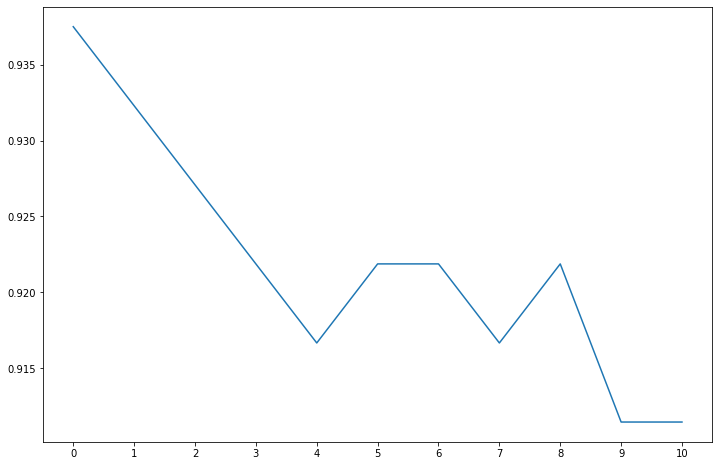

In [862]:
plt.figure(figsize=(12,8))
plt.plot(list(range(11)), accuracy_list)
plt.xticks(list(range(11)))
plt.show()

The plot for my model is clearly decreasing. This means that as I am adding more data from my test data to my training data, the performance of my model was actually decreasing.

### So this semi-supervised approach was certainly a miss ###

#### 16. Using the model that is trained on the entirety of the training data and 100% of the test data (labeled by you), generate a final set of labels for the test data. Be sure to only use last namesin all caps for the labels, as you did in Question 12. Include these in your submission per the instructions below. ####


In [863]:
X_train_final = np.concatenate((X_train2_counts.toarray(), X_test2_counts.toarray()))

labels = [new_labels.get(n, n) for n in trainlabels]
trainlabels_final = labels+trainlabel[-111:]

In [864]:
new_mnb = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

new_mnb.fit(X_train_final, trainlabels_final)

stage2_predictions = new_mnb.predict(X_test2_counts)
stage2_predictions[:10]

array(['BIDEN', 'BUTTIGIEG', 'BOOKER', 'BIDEN', 'KLOBUCHAR', 'BUTTIGIEG',
       'GABBARD', 'HARRIS', 'WARREN', 'WARREN'], dtype='<U9')

In [865]:
print("The set of classes in our predictions: ",set(stage2_predictions))

The set of classes in our predictions:  {'GABBARD', 'CASTRO', 'HARRIS', 'YANG', 'OROURKE', 'STEYER', 'WARREN', 'BIDEN', 'KLOBUCHAR', 'BOOKER', 'BUTTIGIEG', 'SANDERS'}


In [866]:
print("All the classes that exist:",classes)

All the classes that exist: {'bernie sanders', 'tom steyer', "beto o'rourke", 'amy klobuchar', 'cory booker', 'julian castro', 'andrew yang', 'tulsi gabbard', 'joe biden', 'elizabeth warren', 'kamala harris', 'pete buttigieg'}


### Submission and Extra Credit ###


#### In addition to your Jupyter notebook, you must also submit a .txt file. The .txt file should be tab delimited with three columns. The columns should have the following headers (please use all caps): FILE, MODEL1, MODEL2. The first column should contain the name of the file (i.e. test 1.txt, test 2.txt, ... test 111.txt). The second column should contain the labels for the corresponding files from your choice of model from Question 12. The third column should contain the labels for the corresponding files from Question 16. ####

In [867]:
submission = pd.DataFrame({'FILE':test_file_list, 'MODEL1':stage1_predictions, 'MODEL2':stage2_predictions})
submission.head(10)

,FILE,MODEL1,MODEL2
0,test_1.txt,WARREN,BIDEN
1,test_10.txt,WARREN,BUTTIGIEG
2,test_100.txt,STEYER,BOOKER
3,test_101.txt,HARRIS,BIDEN
4,test_102.txt,BUTTIGIEG,KLOBUCHAR
5,test_103.txt,WARREN,BUTTIGIEG
6,test_104.txt,GABBARD,GABBARD
7,test_105.txt,BUTTIGIEG,HARRIS
8,test_106.txt,OROURKE,WARREN
9,test_107.txt,WARREN,WARREN


In [878]:
np.savetxt('submission.txt', submission.values, fmt='%s', delimiter="\t", header="FILE\MODEL1\MODEL2")